# 機械学習スクラッチ　決定木

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from operator import itemgetter

# 【問題1】不純度を求める関数

$
I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}
$

t
 : ノードのインデックス


i
 : クラスのインデックス


K
 : クラスの数


C
i
 : i番目のクラス


P
(
C
i
|
t
)
 :　t番目のノードにおける
C
i
の割合


N
t
,
i
 : t番目のノードのi番目のクラスに属するサンプル数


N
t
,
a
l
l
 : t番目のノードのサンプルの総数



# 【問題2】情報利得を求める関数

次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 
I
(
t
)
 を計算する関数を呼び出して使います。情報利得
I
G
は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。


ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。

$
IG(p) = I(p)-\frac{N_{left,all}}{N_{p,all}}I(left)-\frac{N_{right,all}}{N_{p,all}}I(right)
$

p
 : 親ノードを示すインデックス


l
e
f
t
 : 左側のノードを示すインデックス


r
i
g
h
t
 : 右側のノードを示すインデックス


まずは簡単な例を作り、手計算と関数の結果を比較してください。


《例》


左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

In [83]:
sample_left_gene = np.concatenate([np.zeros(10),np.ones(30)])
#intに変換
sample_left= []
for i in sample_left_gene.tolist():
    i = int(i)
    sample_left.append(i)

In [84]:
sample_right_gene = np.concatenate([np.zeros(20),np.ones(5)])
#intに変換
sample_right= []
for i in sample_right_gene.tolist():
    i = int(i)
    sample_right.append(i)

In [85]:
gini(sample_left)

0.375

In [86]:
gini(sample_right)

0.31999999999999984

In [87]:
len(sample_left)/len(sample)

0.6153846153846154

In [88]:
(len(sample_left)/len(sample))*gini(sample_left)

0.23076923076923078

In [89]:
gini(sample)-((len(sample_left)/len(sample))*gini(sample_left)-(len(sample_right)/len(sample))*gini(sample_right))

0.3893491124260354

In [90]:
gini(sample_right)

0.31999999999999984

In [95]:
def IG(sample, sample_left, sample_right):
    a = gini(sample) - (len(sample_left)/len(sample))*gini(sample_left) - (len(sample_right)/len(sample))*gini(sample_right)
    print(a)
    return 
   

In [96]:
IG(sample, sample_left, sample_right)

0.14319526627218937


# 【問題3】学習

空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。

《組み合わせの取り方》


全ての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。


他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。


《補足》


問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 
I
(
p
)
 は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。

In [2]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X_test = np.concatenate((f0, f1))
y_test = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X_test[random_index]
y = y_test[random_index]

In [19]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        
        
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        """
        self.y = y
        self.results = [] #IG
        self.threshold_index = []
        #predict
        self.threshold_feature = []
        y_pred = []
        
        for feature_num in range(X.shape[1]):  #0 ,1
            for threshold in X[:, feature_num]:
                    
                    #gini_left = _gini(left_splitted_y)
                    left_idx = [i for i, x in enumerate(X[:, feature_num]) if x > threshold]#0~499 0~499 index抽出
                    left_splitted_y = itemgetter(left_idx)(y) #indexに対応するyを抜き出し
                    
                    #gini_right = _gini(right_splitted_y)
                    right_idx = [i for i, x in enumerate(X[:, feature_num]) if x <= threshold]
                    right_splitted_y = itemgetter(right_idx)(y) #indexに対応するyを抜き出し
                    
                    ans = self._IG(self.y, left_splitted_y, right_splitted_y) #IG求める
                    self.results.append(ans)#格納する1000個
                    
                    self.threshold_index.append(threshold)
       
                    
        self.max_index = np.argmax(self.results)
        print(self.max_index)
        self.fit_threshold =  itemgetter(self.max_index)(self.threshold_index) #使うthreshold
        print(self.fit_threshold)
        

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def _gini(self, y):
        ans = 1
        for i in set(y):
            ans -= np.power((len(y[y==i]) / len(y)), 2)
        return ans
    
    def _IG(self, y_sample , left_splitted_y, right_splitted_y):
        ans = self._gini(y_sample) - (len(left_splitted_y)/len(y_sample))*self._gini(left_splitted_y) - (len(right_splitted_y)/len(y_sample))*self._gini(right_splitted_y)
        return ans
    
   
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        self.y_pred= []
        for g in range(X.shape[1]):
            if g ==  0 and 0 <= self.max_index < ((X.shape[0]))*(g+1):
                self.threshold_feature.append(g)
            elif ((X.shape[0])-1)*(g) < self.max_index < ((X.shape[0]))*(g+1):
                self.threshold_feature.append(g)
            else:
                break
                
        for f in range(X.shape[0]):
            if X[f, self.threshold_feature[0]] > self.fit_threshold:
                self.y_pred.append(-1)
            elif X[f, self.threshold_feature[0]] <= self.fit_threshold:
                self.y_pred.append(1)
            else:
                break
        return np.array(self.y_pred)
        
        return

In [20]:
sdt = ScratchDecesionTreeClassifierDepth1()
sdt.fit(X,y)

52
0.5983523162917621


In [27]:
sdt.predict(X).shape

(500,)

In [28]:
from sklearn.metrics import accuracy_score

In [30]:
#正答率は？
accuracy_score(y, y_pred_1)

0.956

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth = 1)

In [58]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [59]:
clf.get_depth()

1

In [60]:
clf.predict(X)

array([-1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,
        1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,
        1,  1, -1,  1,  1

In [61]:
#scikit-learnによる実装の正答率は？
accuracy_score(y, clf.predict(X))

0.956

# 【問題6】決定領域の可視化

In [44]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='DecesionTreeClassifier', xlabel='xlabel', ylabel='ylabel', target_names=['-1', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['blue', 'red']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=10, color=scatter_color[i], label=target_names[i], marker='o')
    #plt.scatter(X[svm.index_support_vectors,0], X[svm.index_support_vectors,1],s=80, marker='o', color='y')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

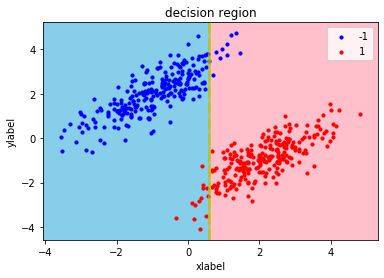

In [45]:
decision_region(X, y, sdt, title="decision region")

In [193]:
prg = ['python', 'java', 'c#']
for i, p in enumerate(prg, start=1):
    print(i, p)

1 python
2 java
3 c#


In [197]:
odds = [i for i in range(10) if i % 2 == 1]
print(odds)
#

[1, 3, 5, 7, 9]


In [198]:
odds = []
for i in range(10):
    if i % 2 == 1:
        odds.append(i)

print(odds)

[1, 3, 5, 7, 9]
